In [1]:
from regression_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгружаем библиотеку NumPy

X, y = get_data()               # Загружаем данные в X и y

In [2]:
def f(X, k):
    # Используем возможность ndarray и умножим массив X на скаляр k
    # Результат этой операции это ndarray
    return k*X

## Функция ошибки

Допустим мы выбрали два коэффициента $k_1$ и $k_2$ для линейной функции $y=kX$, которая описывает эти данные. Как нам понять какой из коэффициентов лучше?

Для это введем **функцию ошибку**, также известную как **функцию потерь** или **loss function**. 

Функция ошибки - численное значение того, насколько хорошо наша функция описывает данные. В данном случает это то, насколько предсказанные значения нашей функции отличаются от реальных.

Обозначается функция потерь как $Loss$, $L$ или $J$. Мы будем использовать $Loss$.

## Визуализируем функцию ошибки

Давайте визуализируем разницу между точками, которые предсказывает функция $f(X) = kX$ и реальными данными.

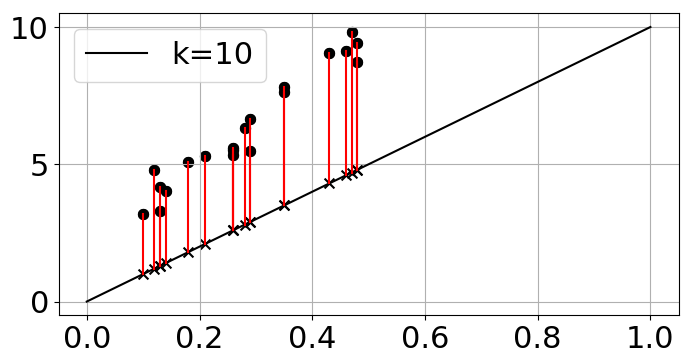

In [3]:
plot_data_and_linear_function_with_error(X, y, k=10)

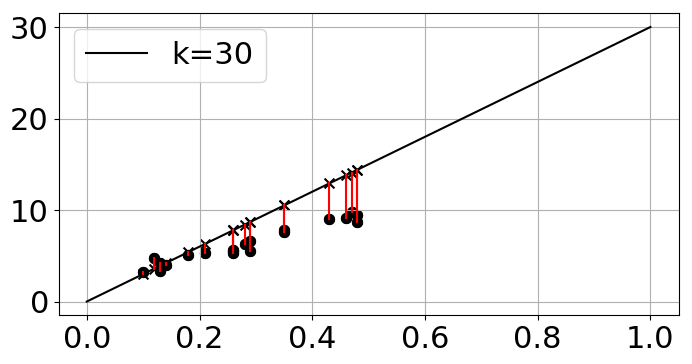

In [4]:
plot_data_and_linear_function_with_error(X, y, k=30)

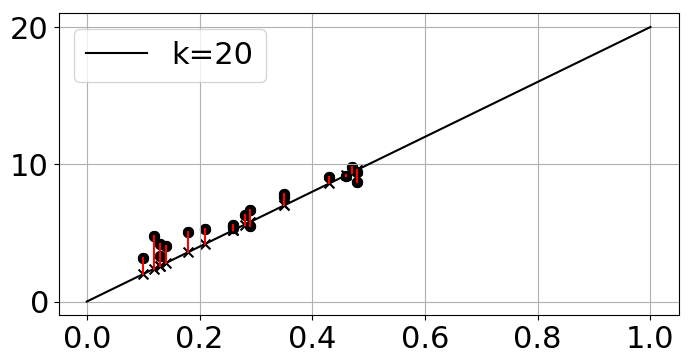

In [5]:
plot_data_and_linear_function_with_error(X, y, k=20)

## Функция ошибки

Пусть у нас есть функция:  

$\widetilde{y} = f(X) = kX$

Тогда $\widetilde{y}$ - это предсказанные нами значения для $X$. 

А настоящие значения будут равны $y$. 

Ошибку нашего предсказания на $i$-ом примере $\widetilde{y}_i$ можно посчитать как: 

$error = \widetilde{y}_i - y_i$

Ошибка $loss_i(k)$ на $i$-ом примере будет равна:

$loss_i(k) = (\widetilde{y}_i - y_i)^2$

$loss_i(k) = (kX_i - y_i)^2$

## Выведем функцию ошибок

$error = \widetilde{y}_i - y_i$

In [6]:
k = 25
error_on_sample(X, y, k)

Разница на примере 0 равна -0.68
Разница на примере 1 равна -1.8
Разница на примере 2 равна -0.06
Разница на примере 3 равна -0.93
Разница на примере 4 равна -0.53
Разница на примере 5 равна -0.58
Разница на примере 6 равна -0.06
Разница на примере 7 равна 1.15
Разница на примере 8 равна 0.89
Разница на примере 9 равна 0.98
Разница на примере 10 равна 0.69
Разница на примере 11 равна 0.61
Разница на примере 12 равна 1.78
Разница на примере 13 равна 0.92
Разница на примере 14 равна 1.12
Разница на примере 15 равна 1.71
Разница на примере 16 равна 2.39
Разница на примере 17 равна 1.92
Разница на примере 18 равна 2.58
Разница на примере 19 равна 3.29


Давайте посмотрим на квадрат разности между предсказанными значение и реальным для коэффициента $k = 25$.

$loss_i(k) = (kX_i - y_i)^2$

In [7]:
k = 25
quad_error_on_sample(X, y, k)

Квадрат разницы на примере 0 равен 0.4624
Квадрат разницы на примере 1 равен 3.24
Квадрат разницы на примере 2 равен 0.0036
Квадрат разницы на примере 3 равен 0.8649
Квадрат разницы на примере 4 равен 0.2809
Квадрат разницы на примере 5 равен 0.3364
Квадрат разницы на примере 6 равен 0.0036
Квадрат разницы на примере 7 равен 1.323
Квадрат разницы на примере 8 равен 0.7921
Квадрат разницы на примере 9 равен 0.9604
Квадрат разницы на примере 10 равен 0.4761
Квадрат разницы на примере 11 равен 0.3721
Квадрат разницы на примере 12 равен 3.168
Квадрат разницы на примере 13 равен 0.8464
Квадрат разницы на примере 14 равен 1.254
Квадрат разницы на примере 15 равен 2.924
Квадрат разницы на примере 16 равен 5.712
Квадрат разницы на примере 17 равен 3.686
Квадрат разницы на примере 18 равен 6.656
Квадрат разницы на примере 19 равен 10.82


## Реализации функции ошибки в Python

In [8]:
k = 25
# f(X, k) возвращает массив ndarray
# y также массив ndarray
# И как мы помним из предыдущего урока, в NumPy реализована возможность поэлементной разности между массивами
errors = f(X, k) - y

print(errors)

[-0.68 -1.8  -0.06 -0.93 -0.53 -0.58 -0.06  1.15  0.89  0.98  0.69  0.61
  1.78  0.92  1.12  1.71  2.39  1.92  2.58  3.29]


В NumPy есть возможность поэлементного возведение в степень.

In [9]:
k = 25
quad_errors = (f(X, k) - y)**2
print(quad_errors)

[4.62400e-01 3.24000e+00 3.60000e-03 8.64900e-01 2.80900e-01 3.36400e-01
 3.60000e-03 1.32250e+00 7.92100e-01 9.60400e-01 4.76100e-01 3.72100e-01
 3.16840e+00 8.46400e-01 1.25440e+00 2.92410e+00 5.71210e+00 3.68640e+00
 6.65640e+00 1.08241e+01]


## Функция ошибки на всех примерах

Мы можем посчитать среднюю ошибку $Loss(k)$ на всех примерах:

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(\widetilde{y}_i - y_i)^2}$ 

Где $N$ - это количество примеров.

Такая функция ошибки называется **среднеквадратичная ошибка (СКО)** или **mean squared error (MSE)**.

## Реализация функции ошибки в Python

Для массива $X$ и реального значения $y$ необходимо реализовать функцию ошибки. 

На входе:


* Массив входных значений $X$;

* Массив реальных выходных значений $y$;

* Коэффициент $k$ функции $f(X)=kX$;


На выходе:

* На выходе значение функции ошибки $Loss(k)$;

Формула функции ошибки:

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $


Формула функции ошибки:

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

In [10]:
def loss_function(X, y, k):
    
    N = X.shape[0]                    # получаем размер вектора столбца
    # или N = len(X)
   
    # создаем массив ошибок для каждого примера
    loss_for_samples = (k*X - y)**2
    
    # берем среднее значение
    loss = np.sum(loss_for_samples) / N      
    
    # или если переписать проще 
    # loss = np.mean((k*X - y)**2)
    return loss

k = 25
print(loss_function(X, y, k))

2.209365


## Ошибки для разных $k$

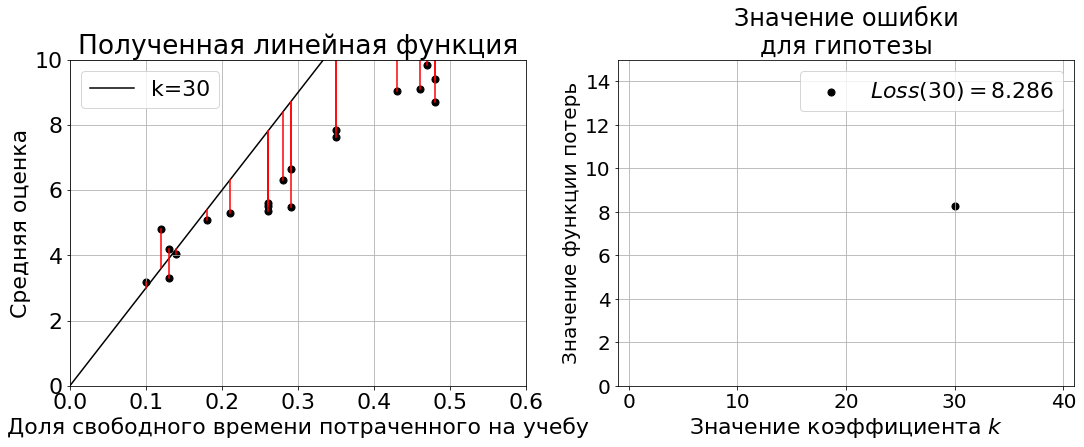

In [11]:
linear_function_and_loss(X, y, k=30)

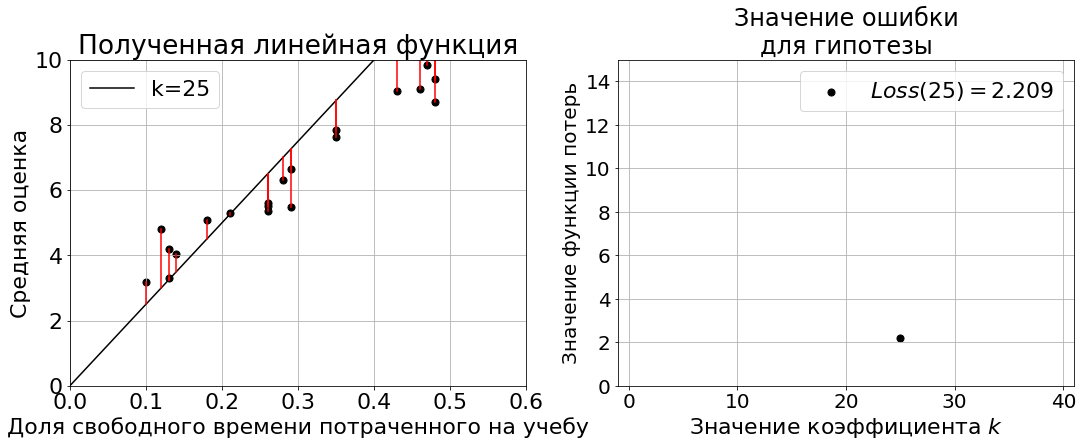

In [12]:
linear_function_and_loss(X, y, k=25)

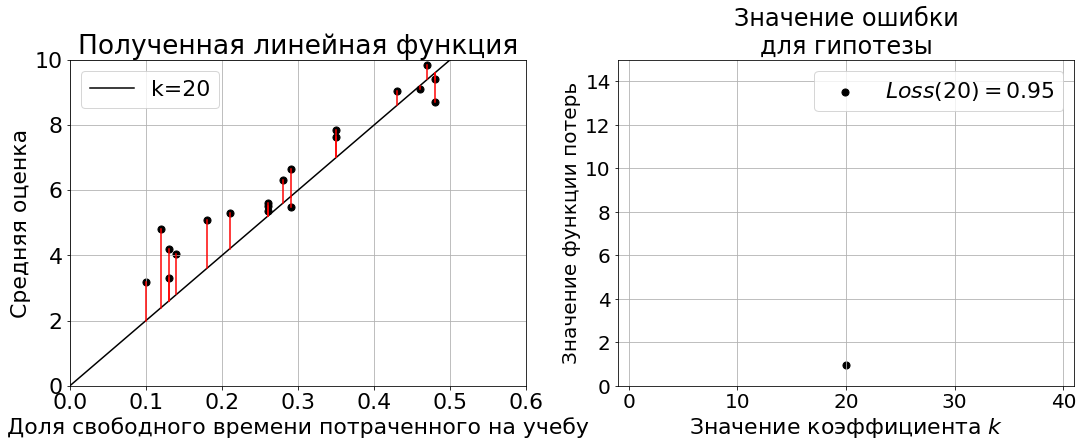

In [13]:
linear_function_and_loss(X, y, k=20)

# Ошибки для всех функция значений $k$

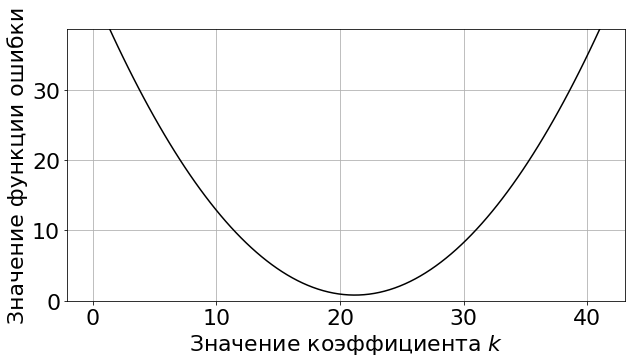

In [14]:
full_loss_function(X, y)

Наша задача: найти такое значение $k$, для которого функция ошибки принимает значение близкое к минимальному.